### Forage Task_2

In [1]:
#importing the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat as st

In [2]:
#Loading the data 
df = pd.read_csv('C:\\Users\\sam\Downloads\\QVI_data.csv')

In [3]:
df.shape #shape of the data

(264834, 12)

In [4]:
type(df['DATE'][0]) #type of the data 

str

In [5]:
#CONVERTING THE DATE FROMAT

df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df['Month_id'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m')

In [7]:
df['Month_num_id'] = pd.to_datetime(df['DATE']).dt.strftime('%m')
df['Month_num_id'].head()

0    10
1    09
2    03
3    03
4    11
Name: Month_num_id, dtype: object

In [8]:
df.head(1)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month_id,Month_num_id
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10,10


In [9]:
#changing the columns
re = {'DATE':'Date','STORE_NBR':'Store_id','LYLTY_CARD_NBR':'Loyalty_id','TXN_ID':'Tax_id'
                    ,'PROD_NBR':'Product_id','PROD_NAME'
                    :'Product_name','PROD_QTY':'Quantity','TOT_SALES':'Total_sales'}
df=  df.rename(columns=re)
df.sample(1)

,Loyalty_id,Date,Store_id,Tax_id,Product_id,Product_name,Quantity,Total_sales,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month_id,Month_num_id
24136,28023,2018-12-31,28,24671,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,160,WOOLWORTHS,YOUNG FAMILIES,Premium,2018-12,12


- ## Measures to Calculate

In [10]:
metrics = df.groupby(["Store_id", "Month_id"]).agg(
    total_sales=("Total_sales", "sum"),  # Sum of total sales per store per month
    unique_customers=("Loyalty_id", "nunique"),  # Unique customers per store per month
    trn_pre_customer=("Loyalty_id", "count"),  # Total transactions per store per month
    total_qty=("Quantity", "sum")  # Total quantity (chips sold) per store per month
).reset_index()

# Calculate additional metrics
metrics["chips_per_txn"] = (metrics["total_qty"] / metrics["trn_pre_customer"]).round(4)
metrics["avg_price_per_unit"] = (metrics["total_sales"] / metrics["total_qty"]).round(4)

metrics

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,1,2018-07,206.9,49,52,62,1.1923,3.3371
1,1,2018-08,176.1,42,43,54,1.2558,3.2611
2,1,2018-09,278.8,59,62,75,1.2097,3.7173
3,1,2018-10,188.1,44,45,58,1.2889,3.2431
4,1,2018-11,192.6,46,47,57,1.2128,3.3789
...,...,...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,48,91,1.8958,4.3462
3165,272,2019-03,442.3,50,53,101,1.9057,4.3792
3166,272,2019-04,445.1,54,56,105,1.8750,4.2390
3167,272,2019-05,314.6,34,40,71,1.7750,4.4310


- ### <font color = 'Darkblue'>Seperating the Pre and the post trial store which desfines  Pre trial stores as the date before 2019-02 and post_trial stores as after 2019-02</font>

- ## Post and Pre Trial and Control Stores

In [11]:
#Date lesser than 2019-02
pre_trail = metrics[metrics['Month_id'] < '2019-02' ]

#Date greater than 2019-02
post_trail = metrics[metrics['Month_id'] >'2019-02']

In [12]:
pre_trail.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,1,2018-07,206.9,49,52,62,1.1923,3.3371
1,1,2018-08,176.1,42,43,54,1.2558,3.2611
2,1,2018-09,278.8,59,62,75,1.2097,3.7173
3,1,2018-10,188.1,44,45,58,1.2889,3.2431
4,1,2018-11,192.6,46,47,57,1.2128,3.3789


## Pretrial_stores

In [13]:
pre_month_in = pre_trail.groupby('Store_id')['Month_id'].nunique() #calculates number of unique months
pre_p = pre_month_in[pre_month_in == max(pre_month_in)].index #filter the data where the Store_id has got max no of month
pre_trail_period = pre_trail.query("Store_id in @pre_p") #filter the data using the querry function
pre_trail_period.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,1,2018-07,206.9,49,52,62,1.1923,3.3371
1,1,2018-08,176.1,42,43,54,1.2558,3.2611
2,1,2018-09,278.8,59,62,75,1.2097,3.7173
3,1,2018-10,188.1,44,45,58,1.2889,3.2431
4,1,2018-11,192.6,46,47,57,1.2128,3.3789


## Post_trial_stores

In [14]:
month_in = post_trail.groupby('Store_id')['Month_id'].nunique() #calculates number of unique months
p = month_in[month_in == max(month_in)].index                   #filter the data where the Store_id has got max no of month
post_trail_period = post_trail.query("Store_id in @p") #filter the data using the querry function
post_trail_period

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
8,1,2019-03,192.9,45,49,58,1.1837,3.3259
9,1,2019-04,192.9,42,43,57,1.3256,3.3842
10,1,2019-05,221.4,46,51,66,1.2941,3.3545
11,1,2019-06,174.1,42,43,53,1.2326,3.2849
20,2,2019-03,192.1,43,46,51,1.1087,3.7667
...,...,...,...,...,...,...,...,...
3156,271,2019-06,928.2,108,129,258,2.0000,3.5977
3165,272,2019-03,442.3,50,53,101,1.9057,4.3792
3166,272,2019-04,445.1,54,56,105,1.8750,4.2390
3167,272,2019-05,314.6,34,40,71,1.7750,4.4310


- ### <font color = 'darkblue'>Selecting the trial stores</font>

In [15]:
stores = [77,86,88] #Select the stores

- ### Trial store data

In [16]:
pre_trail_stores_df = pre_trail_period.query("Store_id in @stores").reset_index(drop=True) #select the data which is in store
pre_trail_stores_df.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,77,2018-07,296.8,51,55,84,1.5273,3.5333
1,77,2018-08,255.5,47,48,74,1.5417,3.4527
2,77,2018-09,225.2,42,44,70,1.5909,3.2171
3,77,2018-10,204.5,37,38,52,1.3684,3.9327
4,77,2018-11,245.3,41,44,67,1.5227,3.6612


In [17]:
post_trail_stores_df  = post_trail_period.query("Store_id in @stores").reset_index(drop=True) #select the data which is in store
post_trail_stores_df.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,77,2019-03,278.5,50,55,82,1.4909,3.3963
1,77,2019-04,263.5,47,48,78,1.6250,3.3782
2,77,2019-05,299.3,55,56,84,1.5000,3.5631
3,77,2019-06,264.7,41,42,70,1.6667,3.7814
4,86,2019-03,1026.8,115,142,284,2.0000,3.6155


- ### control_stores data

In [18]:
pre_control_stores_df = pre_trail_period.query("Store_id  not in @stores").reset_index(drop=True)
pre_control_stores_df.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,1,2018-07,206.9,49,52,62,1.1923,3.3371
1,1,2018-08,176.1,42,43,54,1.2558,3.2611
2,1,2018-09,278.8,59,62,75,1.2097,3.7173
3,1,2018-10,188.1,44,45,58,1.2889,3.2431
4,1,2018-11,192.6,46,47,57,1.2128,3.3789


In [19]:
post_control_stores_df = post_trail_period.query("Store_id  not in @stores").reset_index(drop=True)
post_control_stores_df.head()

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
0,1,2019-03,192.9,45,49,58,1.1837,3.3259
1,1,2019-04,192.9,42,43,57,1.3256,3.3842
2,1,2019-05,221.4,46,51,66,1.2941,3.3545
3,1,2019-06,174.1,42,43,53,1.2326,3.2849
4,2,2019-03,192.1,43,46,51,1.1087,3.7667


- ### Calculating the  Correlation and the Magnitude Distance Between Trial and Control Stores📈

In [20]:
#use the function to calculate the Correlation and the Magnitude distance dynamically 

In [21]:
def correlation_Magnitude(store1,store2,metric): #use the function 
    corr = [] #empty list
   
    a = store1[['Month_id','Store_id',metric]].rename(columns={"Store_id": "Trial_Store", 
                            metric: "trial_sales"}) #store 1 indicates the pre_trial_stores

    for j in store2.Store_id.unique():
        b = store2[store2['Store_id'] == j][['Month_id','Store_id',metric]].rename( #store 2 indicates the pre_control_stores
            columns={"Store_id": "Control_Store", 
                            metric: "control_sales"})
        mer = a.merge(b,on='Month_id',how='inner') #merging the data using the Month_id

        for (trial , control),group in mer.groupby(['Trial_Store','Control_Store']):
            
            # (trial , control),group contains group of store 1 and store 2 eg(77 ,1)
            
            #  calculating the correlation for each combination of the trial_store and the other stores
            if len(group)>1:
                correlation_score = group['trial_sales'].corr(group['control_sales'])
                
                #computing the magnitude distance 
                mag = abs(group['trial_sales'] - group['control_sales'])
                min_val = mag.min()
                max_val = mag.max()

                #Standizing the magnitude distance 
                magnitude = 1-(mag-min_val)/(max_val - min_val)
                magnitude = magnitude.mean()
                corr.append({'Trial_store':trial,'Control_store':control,'Correlation':correlation_score,'Magnitude':magnitude})

    # converting data into  data frame 
    final_df = pd.DataFrame(corr)
    return final_df.sort_values(['Trial_store','Control_store'],ascending=[True,True])


- **Total_Sales**

In [22]:
correlation_Magnitude(pre_trail_stores_df,pre_control_stores_df,'total_sales').groupby('Trial_store').head(5)

,Trial_store,Control_store,Correlation,Magnitude
0,77,1,0.075218,0.408163
3,77,2,-0.263079,0.590119
6,77,3,0.806644,0.522914
9,77,4,-0.263300,0.644934
12,77,5,-0.110652,0.516320
1,86,1,0.445632,0.488334
4,86,2,-0.403835,0.321131
7,86,3,-0.261284,0.507515
10,86,4,-0.039035,0.635654
13,86,5,0.235159,0.579835


- **Unique_customer**

In [23]:
correlation_Magnitude(pre_trail_stores_df,pre_control_stores_df,'unique_customers').head()

,Trial_store,Control_store,Correlation,Magnitude
0,77,1,0.322168,0.663866
3,77,2,-0.572051,0.471429
6,77,3,0.834207,0.489796
9,77,4,-0.295639,0.498258
12,77,5,0.370659,0.512605


 - ### Selecting the Best Control Store

In [24]:
def Store_selection(a,b): #a indicates the pre_trial_store and b indicates pre_control_store
   
    #total_sales_data
    corr_mag_total_sales = correlation_Magnitude(a,b,'total_sales') 

    #unique_customers
    corr_mag_unique_customers = correlation_Magnitude(a,b,'unique_customers')
    
    #merges the data using the merge function 
    df = corr_mag_total_sales.merge(corr_mag_unique_customers,on=['Trial_store','Control_store'],suffixes=['_total_sales',
                                                                                                           '_customer'])
    #calculates the combined score 
    df['score_Sales'] = (0.5 * df['Correlation_total_sales']) + (1- 0.5) * df['Magnitude_total_sales']
    df['score_customers'] =  (0.5 * df['Correlation_customer'])+(1- 0.5) * df['Magnitude_customer']
    
    df['finalScore'] = 0.5 * (df['score_Sales'] +  df['score_customers'])


    return df 


In [25]:
Store_selection(pre_trail_stores_df,pre_control_stores_df)

,Trial_store,Control_store,Correlation_total_sales,Magnitude_total_sales,Correlation_customer,Magnitude_customer,score_Sales,score_customers,finalScore
0,77,1,0.075218,0.408163,0.322168,0.663866,0.241691,0.493017,0.367354
1,77,2,-0.263079,0.590119,-0.572051,0.471429,0.163520,-0.050311,0.056604
2,77,3,0.806644,0.522914,0.834207,0.489796,0.664779,0.662002,0.663390
3,77,4,-0.263300,0.644934,-0.295639,0.498258,0.190817,0.101310,0.146064
4,77,5,-0.110652,0.516320,0.370659,0.512605,0.202834,0.441632,0.322233
...,...,...,...,...,...,...,...,...,...
766,88,268,-0.021429,0.522847,0.672672,0.630252,0.250709,0.651462,0.451086
767,88,269,-0.172578,0.564856,-0.274781,0.360902,0.196139,0.043061,0.119600
768,88,270,-0.723272,0.513329,-0.103032,0.367965,-0.104971,0.132467,0.013748
769,88,271,-0.103037,0.429220,-0.018831,0.655844,0.163091,0.318507,0.240799


- ### Best control store of  <font color = 'darkblue'>Pre_trial Period</font>

In [26]:
Best_control_pre_trial = Store_selection(pre_trail_stores_df,pre_control_stores_df).sort_values(['Trial_store'
                    , 'finalScore'], ascending=[True, False])[['Trial_store','Control_store',
                    'finalScore']].groupby('Trial_store').head(1)
Best_control_pre_trial

,Trial_store,Control_store,finalScore
218,77,233,0.756949
401,86,155,0.770724
681,88,178,0.679316


According to the **InsideSherpa_Task2_DraftSolutions** file the file says that the **control_store for trial_store 88 is 237** ,
but according to the calculation of combined score and the final score the data says **control_store for trial_store 88 is 178**
so this may be an error , **so for the further analysis i am taking 178 as the control store for the trial store 88**

- The **best control stores** for trial stores **77, 86, and 88** are **233, 155, and 178**, respectively, based on the highest **finalScore**, which is derived from a weighted combination of correlation and magnitude measures.

- ### Best control store of  <font color = 'darkblue'>Post_trial Period</font>

The **best control stores** for trial stores **77, 86, and 87** are **35, 179, and 266**, respectively, based on the highest **finalScore**, which is derived from a weighted combination of correlation and magnitude measures.

- ### <font color = 'Darkblue'>Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial📈

In [27]:
Trial_control_stores = trial_control_dict = Best_control_pre_trial.set_index('Trial_store')['Control_store'].to_dict()
#coverting the trial and controlstore into dict , for efficent calculation of the further calculations
Trial_control_stores 

{77: 233, 86: 155, 88: 178}

In [28]:
def ploting_best_store(metrix): #metrix represents the 'total_sales' or unique_customers 
    store_type = []
    past_sales_df = pre_trail_period.copy() #getting the copy of pre_trail_period data 

    # Assign store types dynamically
    for i in past_sales_df['Store_id']: 
        if i in Trial_control_stores.keys(): # indicates the keys in the dict that is (77,88,86)
            store_type.append('Trial_store')
        elif i in Trial_control_stores.values(): # indicates the values in the dict that is (233,155,178)
            store_type.append('Control_store')
        else:
            store_type.append('Other_store')

    past_sales_df['Store_type'] = store_type #creates anew column indicating the store_type 

    # Loop through each trial-control pair and generate plots
    for trial, control in Trial_control_stores.items():
        sales = past_sales_df[past_sales_df['Store_id'].isin([trial, control])]

        sales_df = sales.groupby(['Month_id', 'Store_type'])[metrix].mean().reset_index()
        
        sales_df.pivot(index='Month_id', columns='Store_type', values=metrix).plot(figsize=(12,4),marker='o')

        # Dynamic title
        plt.title(f"Sales Comparison: Trial Store {trial} vs Control Store {control}")
        plt.ylabel("Total Sales")
        plt.xlabel("Month_name")
        plt.legend(title="Store Type")
        plt.gray()
        #plt.grid()
        plt.show()


- ### Let's Visualize for Total_sales

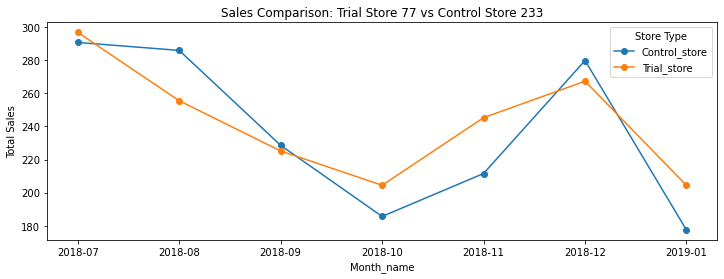

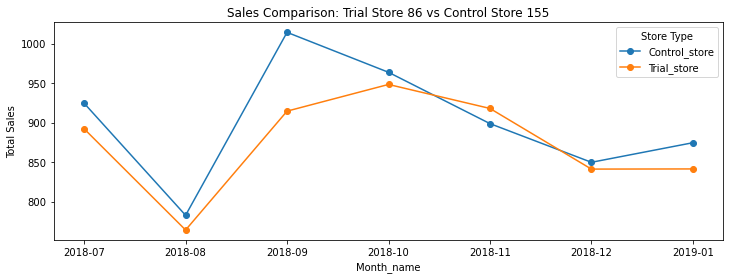

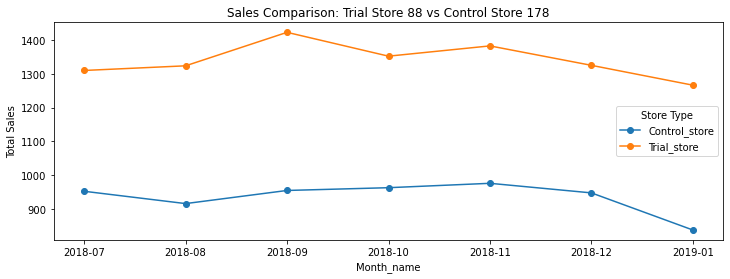

In [29]:
ploting_best_store('total_sales')

- ## <font color = "darkblue">Insights
    
The results show that the trial in store **77 and 86 is significantly different** to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months
and also control store and the trail store have a same trend line and the control store have a good incerse in the sale and also allign with the trial store trend line but **when coming to store (88)** we can notice same trend line but the sales of trial store is greater than the actual control store so we need to **focus more on the store 88 and the assosciated store 178**  .


- ### Let's Visualize for unique_customers

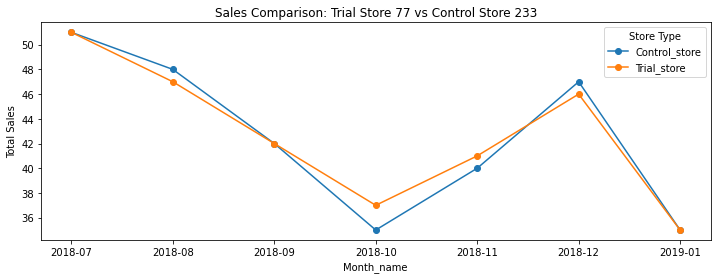

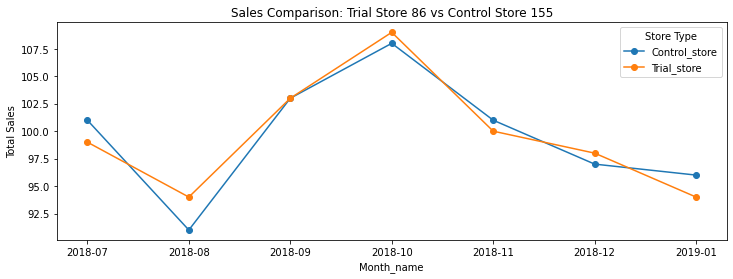

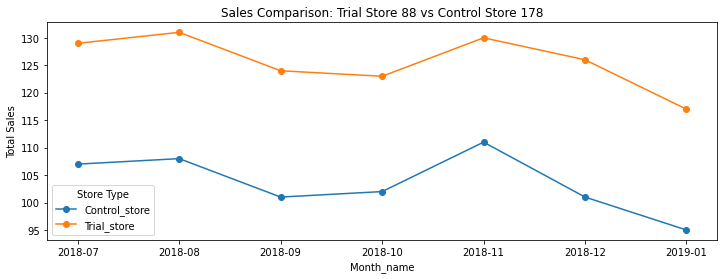

In [30]:
ploting_best_store('unique_customers')

- ## <font color = "darkblue">Insights
    
The results show that the trial in store **77 and 86 is significantly different** to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months
and also control store and the trail store have a same trend line and the control store have a good incerse in the **number of customer** and also allign with the trial store trend line but **when coming to store (88)** we can notice same trend line but the **number of unique customer** of trial store is greater than the actual control store so we need to **focus more on the store 88 and the assosciated store 178**  .


- ## Assessment of trial

**The trial period begind from 1s Feb 2019 to April 2019**

We now want to see if there has been an uplift in overall chip sales.

In [31]:
past_sales_df = pre_trail_period.copy() #creating a copy of the pre_trail_period

In [32]:
store_type = []
past_sales_df = pre_trail_period.copy()

    # Assign store types dynamically
for i in past_sales_df['Store_id']:
    if i in Trial_control_stores.keys():
        store_type.append('Trial_store')
    elif i in Trial_control_stores.values():
        store_type.append('Control_store')
    else:
        store_type.append('Other_store')

past_sales_df['Store_type'] = store_type

In [33]:
past_sales_df

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit,Store_type
0,1,2018-07,206.9,49,52,62,1.1923,3.3371,Other_store
1,1,2018-08,176.1,42,43,54,1.2558,3.2611,Other_store
2,1,2018-09,278.8,59,62,75,1.2097,3.7173,Other_store
3,1,2018-10,188.1,44,45,58,1.2889,3.2431,Other_store
4,1,2018-11,192.6,46,47,57,1.2128,3.3789,Other_store
...,...,...,...,...,...,...,...,...,...
3159,272,2018-09,304.7,32,36,71,1.9722,4.2915,Other_store
3160,272,2018-10,430.6,44,51,99,1.9412,4.3495,Other_store
3161,272,2018-11,376.2,41,45,87,1.9333,4.3241,Other_store
3162,272,2018-12,403.9,47,47,89,1.8936,4.5382,Other_store


- ## Appling the Scaling Factor

In [34]:
Trial_control_stores.values()

dict_values([233, 155, 178])

In [35]:
scaled_list = []
for trial , control in Trial_control_stores.items():
    a_trial_store = past_sales_df[past_sales_df['Store_id'] == trial]['total_sales'].sum() # trial indicates the keys 
    b_trial_store = past_sales_df[past_sales_df['Store_id'] == control]['total_sales'].sum() #control indicating the values
    
    scaled_cal = a_trial_store/b_trial_store #indicating the trial and control_store 
    scaled_list.append({control:scaled_cal})
    print(scaled_cal)

1.023617303289553
0.9700651481287743
1.4338146535258616


In [36]:
scaled_dict = {list(d.keys())[0]: list(d.values())[0] for d in scaled_list} #converting the scaled_values into dict 
scaled_dict

{233: 1.023617303289553, 155: 0.9700651481287743, 178: 1.4338146535258616}

In [37]:
def Scaled_controled_percent_cal_df(metrix): #creating a function
    scaled_list = []
    
    for trial , control in Trial_control_stores.items():
        a_trial_store = past_sales_df[past_sales_df['Store_id'] == trial][metrix].sum()
        b_trial_store = past_sales_df[past_sales_df['Store_id'] == control][metrix].sum()
        
        scaled_cal = (a_trial_store /b_trial_store) #divides the trial_sales and the control sales 
        scaled_list.append({control:scaled_cal}) #converting the scaled_values into dict 

        scaled_dict = {list(d.keys())[0]: list(d.values())[0] for d in scaled_list}
    print("Control store and corresponding scales_values",scaled_dict)
    Scaled_control_sales_df = []

    for j , i in scaled_dict.items(): #iterrtes each key and value in the dict 
        pp = metrics.loc[metrics['Store_id'] == j] #extracts the data for the coressponding data frame 
        pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict 

        Scaled_control_sales_df.append(pp) # appending the data 
    Scaled_df = pd.concat(Scaled_control_sales_df) # converting into data frame 
    #return scaled_dict
    return Scaled_df #returns the dataframe 

In [38]:
Scaled_controled_percent_cal_df('total_sales').head()

Control store and corresponding scales_values {233: 1.023617303289553, 155: 0.9700651481287743, 178: 1.4338146535258616}


C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A val

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit,control_total_sales
2699,233,2018-07,290.7,51,54,88,1.6296,3.3034,297.565550
2700,233,2018-08,285.9,48,50,80,1.6000,3.5737,292.652187
2701,233,2018-09,228.6,42,45,70,1.5556,3.2657,233.998916
2702,233,2018-10,185.7,35,36,56,1.5556,3.3161,190.085733
2703,233,2018-11,211.6,40,41,62,1.5122,3.4129,216.597421


- ### Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.




- w'll take the metrics calculation 

In [39]:
metrics.sample(5) #random 5 data

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit
2157,185,2018-11,202.3,42,42,59,1.4048,3.4288
721,62,2019-05,754.9,94,114,219,1.9211,3.4470
997,87,2019-03,327.7,37,41,73,1.7805,4.4890
860,74,2018-12,200.2,43,44,56,1.2727,3.5750
1606,139,2018-12,32.1,6,6,9,1.5000,3.5667


In [40]:
Sales_scaledControlSales = Scaled_controled_percent_cal_df('total_sales')[['Month_id','Store_id','control_total_sales']]
Sales_scaledControlSales.head()

Control store and corresponding scales_values {233: 1.023617303289553, 155: 0.9700651481287743, 178: 1.4338146535258616}


C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A val

,Month_id,Store_id,control_total_sales
2699,2018-07,233,297.565550
2700,2018-08,233,292.652187
2701,2018-09,233,233.998916
2702,2018-10,233,190.085733
2703,2018-11,233,216.597421


- **<font color = 'darkblue'>Calculation to get all the trial stores**

In [41]:
def Get_trial_df(metrix):
    Trial_scaled_metrix_df = []
    for i in Trial_control_stores.keys(): #inicating the control_store id

        Trial_scaled_metrix =(metrics[metrics['Store_id'] == i][['Month_id',metrix]]) 
        #extracts the total_sales data for the coressponding control store 

        Trial_scaled_metrix_df.append(Trial_scaled_metrix)
        #appends the data 

    Trial_scaled_df = pd.concat(Trial_scaled_metrix_df) #converst the data into frame using the pd.concat function 
    return Trial_scaled_df #returns the records

In [42]:
Get_trial_df('total_sales').head()

,Month_id,total_sales
880,2018-07,296.8
881,2018-08,255.5
882,2018-09,225.2
883,2018-10,204.5
884,2018-11,245.3


- #### concats the data of the  Trial_scaled_df and the Percent df

In [43]:
Trial_scaled_df = Get_trial_df('total_sales')
Trial_scaled_df.head()

,Month_id,total_sales
880,2018-07,296.8
881,2018-08,255.5
882,2018-09,225.2
883,2018-10,204.5
884,2018-11,245.3


In [44]:
percent_df = pd.concat(
    [Sales_scaledControlSales[['Store_id','control_total_sales']].reset_index(drop=True),
    Trial_scaled_df.reset_index(drop=True)],axis=1)
percent_df.head()


,Store_id,control_total_sales,Month_id,total_sales
0,233,297.565550,2018-07,296.8
1,233,292.652187,2018-08,255.5
2,233,233.998916,2018-09,225.2
3,233,190.085733,2018-10,204.5
4,233,216.597421,2018-11,245.3


In [45]:
percent_df['Percent_diff'] = abs(percent_df.control_total_sales - percent_df.total_sales) / percent_df.control_total_sales

In [46]:
percent_df.head()

,Store_id,control_total_sales,Month_id,total_sales,Percent_diff
0,233,297.565550,2018-07,296.8,0.002573
1,233,292.652187,2018-08,255.5,0.126950
2,233,233.998916,2018-09,225.2,0.037602
3,233,190.085733,2018-10,204.5,0.075830
4,233,216.597421,2018-11,245.3,0.132516


### Calculating the standard deivation for Each control store 

In [47]:
import statistics as st 

def Standard_deviation_cal(metrix):
    percent_store_list = []  # Store results as a list of dictionaries

    for i in metrix['Store_id'].unique():  
        store_data = metrix.loc[(metrix['Month_id'] < '2019-02') & (metrix['Store_id'] == i)]

        if len(store_data) > 1:  # Ensure enough values for std deviation
            std_dev = st.stdev(store_data['Percent_diff'])  
        else:
            std_dev = None  # Avoid error if only one or zero values

        percent_store_list.append({'Store_id': i, "percent": std_dev})

    # Convert list of dictionaries to DataFrame
    percent_difference_df = pd.DataFrame(percent_store_list)

    percent_difference_df = percent_difference_df.set_index('Store_id')['percent'].to_dict()
    return percent_difference_df

In [48]:
Standard_deviation_cal(percent_df)

{233: 0.04994076264142537, 155: 0.025833952854772368, 178: 0.01707405192279757}

In [49]:
N_degrees_of_freedom = 8-1 #Total there are 8 months , so 8 -1 = 7
N_degrees_of_freedom

7

In [50]:
percent_df.head()

,Store_id,control_total_sales,Month_id,total_sales,Percent_diff
0,233,297.565550,2018-07,296.8,0.002573
1,233,292.652187,2018-08,255.5,0.126950
2,233,233.998916,2018-09,225.2,0.037602
3,233,190.085733,2018-10,204.5,0.075830
4,233,216.597421,2018-11,245.3,0.132516


In [81]:
assement_precent_df = percent_df[(percent_df['Month_id'] < '2019-05') &(percent_df['Month_id'] > '2019-01') ]
assement_precent_df #filters the data for 3 months

,Store_id,control_total_sales,Month_id,total_sales,Percent_diff
7,233,249.762622,2019-02,235.0,0.059107
8,233,203.802205,2019-03,278.5,0.366521
9,233,162.345704,2019-04,263.5,0.623080
19,155,864.522060,2019-02,913.2,0.056306
20,155,780.320405,2019-03,1026.8,0.315870
21,155,819.317024,2019-04,848.2,0.035253
31,178,1561.137395,2019-02,1370.2,0.122307
32,178,1432.094076,2019-03,1477.2,0.031496
33,178,1519.556770,2019-04,1439.4,0.052750


In [96]:
assement_precent_df['tvalue'] = assement_precent_df['Store_id'].map(Standard_deviation_cal(percent_df)).fillna(0)
assement_precent_df

C:\Users\sam\AppData\Local\Temp\ipykernel_18772\2017738957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assement_precent_df['tvalue'] = assement_precent_df['Store_id'].map(Standard_deviation_cal(percent_df)).fillna(0)


,Store_id,control_total_sales,Month_id,total_sales,Percent_diff,tvalue
7,233,249.762622,2019-02,235.0,0.059107,0.049941
8,233,203.802205,2019-03,278.5,0.366521,0.049941
9,233,162.345704,2019-04,263.5,0.623080,0.049941
19,155,864.522060,2019-02,913.2,0.056306,0.025834
20,155,780.320405,2019-03,1026.8,0.315870,0.025834
21,155,819.317024,2019-04,848.2,0.035253,0.025834
31,178,1561.137395,2019-02,1370.2,0.122307,0.017074
32,178,1432.094076,2019-03,1477.2,0.031496,0.017074
33,178,1519.556770,2019-04,1439.4,0.052750,0.017074


In [100]:
assement_precent_df['tvalue_cal'] = (assement_precent_df['Percent_diff'] - 0) / assement_precent_df['tvalue']
assement_precent_df[['Store_id','tvalue_cal']]  #calculates the t_value score

C:\Users\sam\AppData\Local\Temp\ipykernel_18772\1319079082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assement_precent_df['tvalue_cal'] = (assement_precent_df['Percent_diff'] - 0) / assement_precent_df['tvalue']


,Store_id,tvalue_cal
7,233,1.183534
8,233,7.339116
9,233,12.476373
19,155,2.179542
20,155,12.226922
21,155,1.364580
31,178,7.163302
32,178,1.844699
33,178,3.089489


In [102]:
from scipy.stats import t #importing the stat module and test the hypothesis

t95 = t.isf(0.05,N_degrees_of_freedom)
print("The value of  95th percentile for N_degrees_of_freedom is", t95)

The value of  95th percentile for N_degrees_of_freedom is 1.8945786050613054


In [88]:
controlSales_Percentile = Sales_scaledControlSales.set_index('Month_id')[['Store_id','control_total_sales']]
controlSales_Percentile.groupby('Store_id').head(3)

,Store_id,control_total_sales
Month_id,,
2018-07,233,297.565550
2018-08,233,292.652187
2018-09,233,233.998916
2018-07,155,896.922236
2018-08,155,759.269991
2018-09,155,984.034086
2018-07,178,1364.991550
2018-08,178,1312.657315
2018-09,178,1368.432705


In [89]:

#controlSales_Percentile['5th_percentile'] = controlSales_Percentile['controlSales'] * (1 - 0.04994076264142537*2)

In [90]:
percent_difference_df = Standard_deviation_cal(percent_df)
percent_difference_df

{233: 0.04994076264142537, 155: 0.025833952854772368, 178: 0.01707405192279757}

In [91]:
controlSales_Percentile['stdev'] = controlSales_Percentile['Store_id'].map(percent_difference_df).fillna(0)

controlSales_Percentile['95th_percentile'] = controlSales_Percentile['control_total_sales'] * (1 + controlSales_Percentile.stdev*2)

controlSales_Percentile['5th_percentile'] = controlSales_Percentile['control_total_sales'] * (1 - controlSales_Percentile.stdev*2)

In [92]:
controlSales_Percentile[['control_total_sales','95th_percentile','5th_percentile']].head()

,control_total_sales,95th_percentile,5th_percentile
Month_id,,,
2018-07,297.565550,327.286851,267.844249
2018-08,292.652187,321.882734,263.421640
2018-09,233.998916,257.371084,210.626747
2018-10,190.085733,209.071786,171.099680
2018-11,216.597421,238.231502,194.963341


In [93]:
Total_sales_Percentile_df = pd.concat([controlSales_Percentile, Trial_scaled_df.set_index('Month_id')],
                                      axis=1)[['Store_id','total_sales'
                                                ,'control_total_sales','95th_percentile','5th_percentile']]


In [94]:
Total_sales_Percentile_df.head()

,Store_id,total_sales,control_total_sales,95th_percentile,5th_percentile
Month_id,,,,,
2018-07,233,296.8,297.565550,327.286851,267.844249
2018-08,233,255.5,292.652187,321.882734,263.421640
2018-09,233,225.2,233.998916,257.371084,210.626747
2018-10,233,204.5,190.085733,209.071786,171.099680
2018-11,233,245.3,216.597421,238.231502,194.963341


### Ploting the Trial_assement on TotalSales

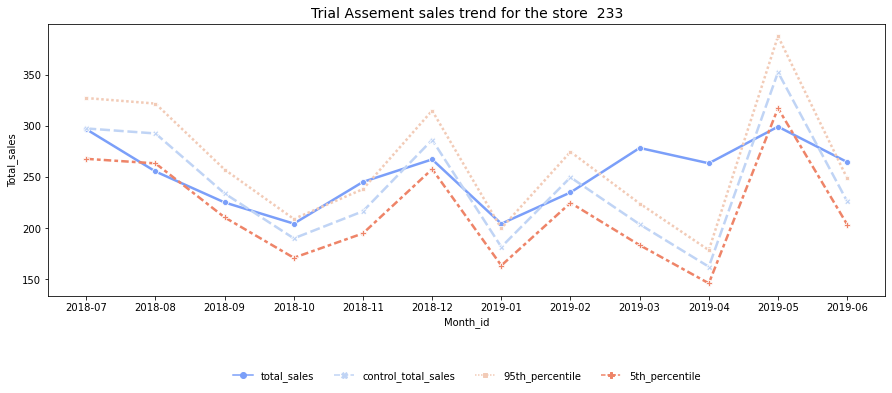

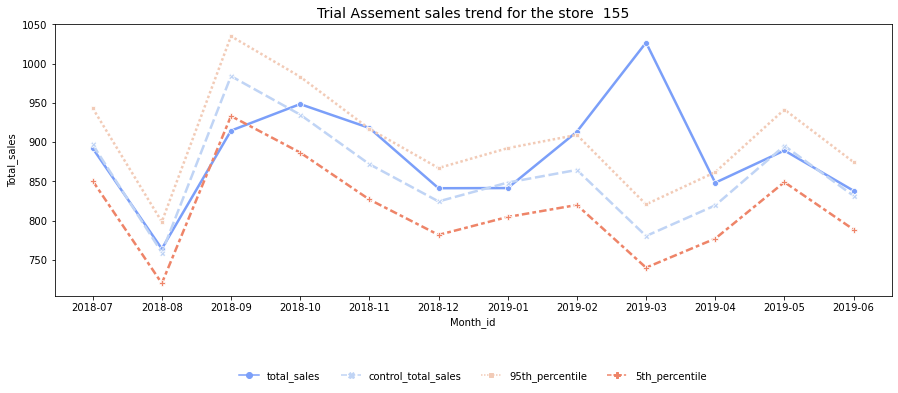

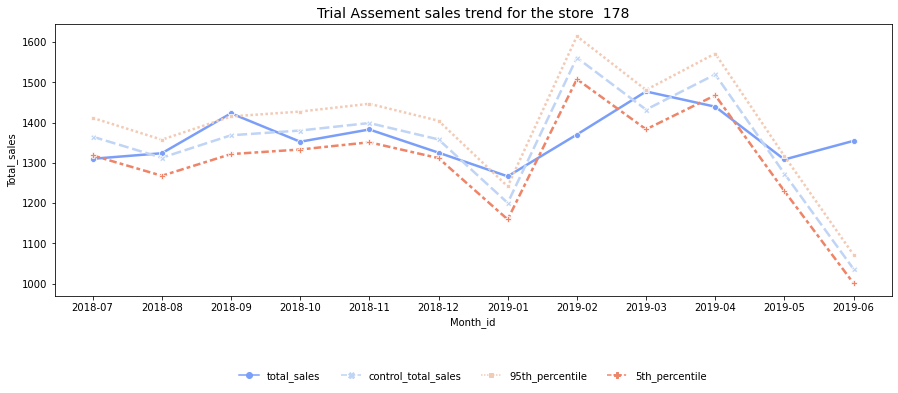

In [105]:
for i in Total_sales_Percentile_df.Store_id.unique():
    
    df = Total_sales_Percentile_df[Total_sales_Percentile_df['Store_id'] == i]
    
    cal_df = df[['total_sales','control_total_sales','95th_percentile','5th_percentile']]
    plt.figure(figsize=(15,5))
    
    plot = sns.lineplot(data=cal_df , dashes=True , markers=True ,palette="coolwarm", linewidth=2.5)
    sns.move_legend(plot,"lower center",bbox_to_anchor=(0.5, -0.35),ncol = 4,frameon = False)
    plt.title(f"Trial Assement sales trend for the store  {  i}",fontsize=14)
    plt.ylabel("Total_sales")

## <font color = "darkblue">Insights 


### The results for trial stores **77 and 88 during the trial period show a significant**  difference in at least two of the three trial months but this is not the case for  trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in  **Total sales ** 

### Let's compute for unique_customers

- **Let's use the Scaled_controled_percent_cal_df function to calculate the scaled values**

In [63]:
Scaled_controled_percent_cal_df('unique_customers').head() 

Control store and corresponding scales_values {233: 1.0033557046979866, 155: 1.0, 178: 1.2137931034482758}


C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A val

,Store_id,Month_id,total_sales,unique_customers,trn_pre_customer,total_qty,chips_per_txn,avg_price_per_unit,control_unique_customers
2699,233,2018-07,290.7,51,54,88,1.6296,3.3034,51.171141
2700,233,2018-08,285.9,48,50,80,1.6000,3.5737,48.161074
2701,233,2018-09,228.6,42,45,70,1.5556,3.2657,42.140940
2702,233,2018-10,185.7,35,36,56,1.5556,3.3161,35.117450
2703,233,2018-11,211.6,40,41,62,1.5122,3.4129,40.134228


In [64]:
Customers_scaledControlSales = Scaled_controled_percent_cal_df('unique_customers')[['Month_id','Store_id',
                                                                                    'control_unique_customers']]
Customers_scaledControlSales.head()

Control store and corresponding scales_values {233: 1.0033557046979866, 155: 1.0, 178: 1.2137931034482758}


C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp[f'control_{metrix}'] = pp[metrix] * i # multiplies the control sales with values in the dict
C:\Users\sam\AppData\Local\Temp\ipykernel_18772\4216112900.py:17: SettingWithCopyWarning: 
A val

,Month_id,Store_id,control_unique_customers
2699,2018-07,233,51.171141
2700,2018-08,233,48.161074
2701,2018-09,233,42.140940
2702,2018-10,233,35.117450
2703,2018-11,233,40.134228


- **<font color = 'darkblue'>Calculation to get all the trial stores**

In [65]:
Get_trial_df('unique_customers').head()

,Month_id,unique_customers
880,2018-07,51
881,2018-08,47
882,2018-09,42
883,2018-10,37
884,2018-11,41


- #### concats the data of the  Trial_scaled_df and the Percent df

In [66]:
unique_customers_scaled_df = Get_trial_df('unique_customers')
unique_customers_scaled_df.head()

,Month_id,unique_customers
880,2018-07,51
881,2018-08,47
882,2018-09,42
883,2018-10,37
884,2018-11,41


In [67]:
cust_percent_df = pd.concat(
    [Customers_scaledControlSales[['Store_id','control_unique_customers']].reset_index(drop=True),
    unique_customers_scaled_df.reset_index(drop=True)],axis=1)
cust_percent_df.head()

,Store_id,control_unique_customers,Month_id,unique_customers
0,233,51.171141,2018-07,51
1,233,48.161074,2018-08,47
2,233,42.140940,2018-09,42
3,233,35.117450,2018-10,37
4,233,40.134228,2018-11,41


- **Calculting the percentage_difference**

In [68]:
cust_percent_df['Percent_diff']  = abs(cust_percent_df.control_unique_customers 
                                       -cust_percent_df.unique_customers) / cust_percent_df.control_unique_customers

In [69]:
cust_percent_df.head()

,Store_id,control_unique_customers,Month_id,unique_customers,Percent_diff
0,233,51.171141,2018-07,51,0.003344
1,233,48.161074,2018-08,47,0.024108
2,233,42.140940,2018-09,42,0.003344
3,233,35.117450,2018-10,37,0.053607
4,233,40.134228,2018-11,41,0.021572


- ### Calculating the Standard Deviation for the unique_customers


- Using the Standard_deviation_cal function

In [70]:
Standard_deviation_cal(cust_percent_df)

{233: 0.018240748558243945,
 155: 0.010687444701395236,
 178: 0.012417826272588403}

In [71]:
assement_customer_df = cust_percent_df[(cust_percent_df['Month_id'] < '2019-05') &(cust_percent_df['Month_id'] > '2019-01') ]
assement_customer_df

,Store_id,control_unique_customers,Month_id,unique_customers,Percent_diff
7,233,45.151007,2019-02,45,0.003344
8,233,40.134228,2019-03,50,0.245819
9,233,30.100671,2019-04,47,0.561427
19,155,95.000000,2019-02,107,0.126316
20,155,94.000000,2019-03,115,0.223404
21,155,99.000000,2019-04,105,0.060606
31,178,129.875862,2019-02,124,0.045242
32,178,138.372414,2019-03,134,0.031599
33,178,142.013793,2019-04,128,0.098679


In [72]:
Standard_deviation_cal(cust_percent_df)

{233: 0.018240748558243945,
 155: 0.010687444701395236,
 178: 0.012417826272588403}

In [73]:
assement_customer_df['tvalue'] = assement_customer_df['Store_id'].map(Standard_deviation_cal(cust_percent_df)).fillna(0)
assement_customer_df

C:\Users\sam\AppData\Local\Temp\ipykernel_18772\2722527688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assement_customer_df['tvalue'] = assement_customer_df['Store_id'].map(Standard_deviation_cal(cust_percent_df)).fillna(0)


,Store_id,control_unique_customers,Month_id,unique_customers,Percent_diff,tvalue
7,233,45.151007,2019-02,45,0.003344,0.018241
8,233,40.134228,2019-03,50,0.245819,0.018241
9,233,30.100671,2019-04,47,0.561427,0.018241
19,155,95.000000,2019-02,107,0.126316,0.010687
20,155,94.000000,2019-03,115,0.223404,0.010687
21,155,99.000000,2019-04,105,0.060606,0.010687
31,178,129.875862,2019-02,124,0.045242,0.012418
32,178,138.372414,2019-03,134,0.031599,0.012418
33,178,142.013793,2019-04,128,0.098679,0.012418


In [74]:
assement_customer_df['tValue_cal'] = (assement_customer_df['Percent_diff'] - 0) / assement_customer_df['tvalue']
assement_customer_df[['Store_id','tValue_cal']]

C:\Users\sam\AppData\Local\Temp\ipykernel_18772\1367422158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assement_customer_df['tValue_cal'] = (assement_customer_df['Percent_diff'] - 0) / assement_customer_df['tvalue']


,Store_id,tValue_cal
7,233,0.183352
8,233,13.476388
9,233,30.778725
19,155,11.819082
20,155,20.903430
21,155,5.670772
31,178,3.643322
32,178,2.544639
33,178,7.946568


In [75]:
control_uniqcust_Percentile = Customers_scaledControlSales.set_index('Month_id')[['Store_id','control_unique_customers']]
control_uniqcust_Percentile.head()

,Store_id,control_unique_customers
Month_id,,
2018-07,233,51.171141
2018-08,233,48.161074
2018-09,233,42.140940
2018-10,233,35.117450
2018-11,233,40.134228


In [76]:
control_uniqcust_Percentile['stdev'] = control_uniqcust_Percentile['Store_id'].map(Standard_deviation_cal(
    cust_percent_df)).fillna(0)

control_uniqcust_Percentile['95th_percentile'] = control_uniqcust_Percentile['control_unique_customers'] * (1 
                                    + control_uniqcust_Percentile.stdev*2)

control_uniqcust_Percentile['5th_percentile'] = control_uniqcust_Percentile['control_unique_customers'] * (1
                                    - control_uniqcust_Percentile.stdev*2)

In [77]:
control_uniqcust_Percentile.head()

,Store_id,control_unique_customers,stdev,95th_percentile,5th_percentile
Month_id,,,,,
2018-07,233,51.171141,0.018241,53.037941,49.304341
2018-08,233,48.161074,0.018241,49.918062,46.404086
2018-09,233,42.140940,0.018241,43.678304,40.603575
2018-10,233,35.117450,0.018241,36.398587,33.836313
2018-11,233,40.134228,0.018241,41.598385,38.670071


In [78]:
Total_customer_Percentile_df = pd.concat([control_uniqcust_Percentile, unique_customers_scaled_df.set_index('Month_id')],
                                      axis=1)[['Store_id','unique_customers'
                                                ,'control_unique_customers','95th_percentile','5th_percentile']]


In [79]:
Total_customer_Percentile_df.head()

,Store_id,unique_customers,control_unique_customers,95th_percentile,5th_percentile
Month_id,,,,,
2018-07,233,51,51.171141,53.037941,49.304341
2018-08,233,47,48.161074,49.918062,46.404086
2018-09,233,42,42.140940,43.678304,40.603575
2018-10,233,37,35.117450,36.398587,33.836313
2018-11,233,41,40.134228,41.598385,38.670071


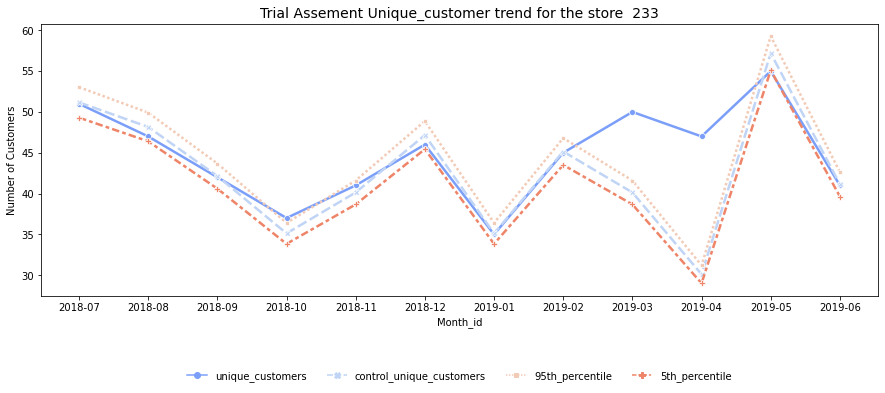

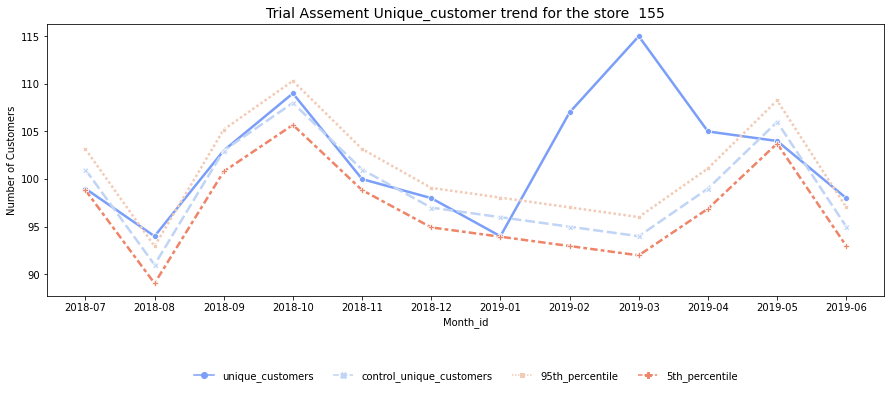

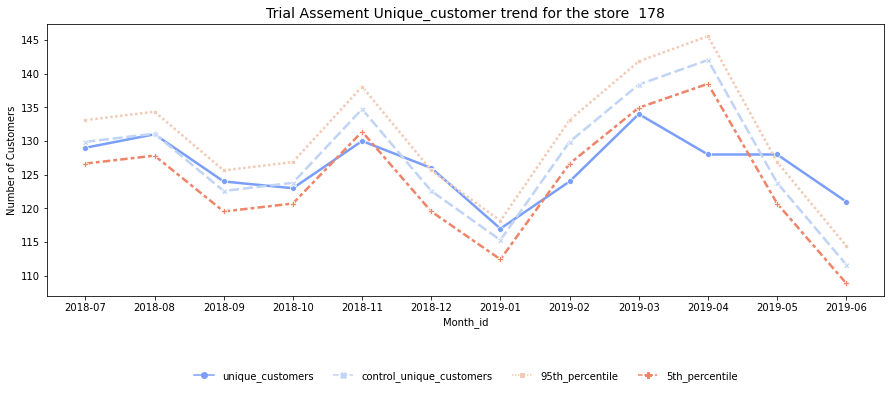

In [104]:
for i in Total_customer_Percentile_df.Store_id.unique():
    
    df = Total_customer_Percentile_df[Total_customer_Percentile_df['Store_id'] == i]
    
    cal_df = df[['unique_customers','control_unique_customers','95th_percentile','5th_percentile']]
    plt.figure(figsize=(15,5))
    
    plot = sns.lineplot(data=cal_df , dashes=True , markers=True ,palette="coolwarm", linewidth=2.5)
    sns.move_legend(plot,"lower center",bbox_to_anchor=(0.5, -0.35),ncol = 4,frameon = False)
    plt.title(f"Trial Assement Unique_customer trend for the store  {  i}",fontsize=14)
    plt.ylabel("Number of Customers")

### Insights

### The results for trial stores **77 and 88 during the trial period show a significant**  difference in at least two of the three trial months but this is not the case for  trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in  **Number of unique customers.**  📈⬆️⬇️